# INTRO

We will work on prepared data from JustJoinIT which includes dataset of job profiles for IT specialists. 

Dataset was prepared for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/tymoteuszhuba/Desktop/Python/my_projects/JustJoinIT_project/prepared_data.csv')
df.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,170+,senior,True,07-06-22,С++ (level 4),permanent,No info,No info,NaN
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,170+,senior,True,07-05-22,С++ (level 4),permanent,No info,No info,NaN
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,30+,senior,True,11-04-22,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000,25000,pln
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,30+,senior,True,11-04-22,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000,25000,pln
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90,junior,True,11-04-22,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400,7300,pln


In [3]:
df.shape

(11367731, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11367731 entries, 0 to 11367730
Data columns (total 15 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   title             object
 1   marker_icon       object
 2   workplace_type    object
 3   company_name      object
 4   city              object
 5   country_code      object
 6   company_size      object
 7   experience_level  object
 8   remote            bool  
 9   published_at      object
 10  skills            object
 11  employment        object
 12  salary_from       object
 13  salary_to         object
 14  currency          object
dtypes: bool(1), object(14)
memory usage: 1.2+ GB


In [5]:
df.describe()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
count,11367731,11367731,11367731,11367731,11367731,11362549,11367731,11367731,11367731,11367731,11363751,11367731,11367731,11367731,8098081
unique,32266,24,3,7679,1652,88,1108,3,2,731,57118,3,1471,1826,5
top,Java Developer,javascript,remote,Nokia,Warszawa,PL,100+,mid,True,15-07-22,"Hibernate (level 3), Spring (level 3), Java (l...",b2b,No info,No info,pln
freq,213962,1597783,8571280,132460,2273844,11087092,479713,6154752,8571280,37576,14392,6004748,3269650,3269650,7543212


# DATA RESTRUCTURISATION

We need to prepare our data structure for analysis. 

- At the beginning we will remove duplicates 
- First we will convert objects into strings to keep better efficient code
- Then we need to change the city to start with big letter and remove a post code
- Next we need to prepare our salary from and to for numeric type

### Remove duplicates

In our dataset we don't include a duplicates. We just focus on unique data

In [6]:
# sprawdzamy duplikaty
duplicate_rows = df[df.duplicated(subset=['title', 'company_name', 'city', 'salary_from', 'salary_to', 'employment'])] 
duplicate_rows

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
143,Administrator Baz Danych-Programista Sql,data,remote,Omtech Sp. z o.o.,Warszawa,PL,35-40,mid,True,11-04-22,"Java 8 (level 3), PostgreSQL (level 3), SQL (l...",b2b,No info,No info,NaN
144,Administrator Baz Danych-Programista Sql,data,remote,Omtech Sp. z o.o.,Warszawa,PL,35-40,mid,True,11-04-22,"Java 8 (level 3), PostgreSQL (level 3), SQL (l...",permanent,No info,No info,NaN
357,Senior Qa Automation Specialist (Java),testing,remote,PGS Software S.A.,Wrocław,PL,800+,senior,True,11-04-22,"Cucumber (level 4), Selenium/WebDriver/Selenid...",b2b,19300,26100,pln
358,Senior Qa Automation Specialist (Java),testing,remote,PGS Software S.A.,Wrocław,PL,800+,senior,True,11-04-22,"Cucumber (level 4), Selenium/WebDriver/Selenid...",permanent,14600,20500,pln
1089,Regular Backend Developer,php,partly_remote,Centra,Wrocław,PL,70+,mid,False,11-04-22,"Git (level 3), MariaDB (level 3), PHP 7 (level 3)",b2b,12000,17000,pln
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11367726,Fullstack Developer (Node.Js & React),javascript,remote,Mindpal,Kraków,PL,50 - 100,mid,True,14-09-23,"JavaScript (level 3), React (level 3), Node.js...",b2b,14500,22500,pln
11367727,Technical Project Manager With German,pm,office,Devire,Warszawa,PL,200+,mid,False,13-09-23,"Cloud (level 3), Project Management (level 3)",permanent,20000,30000,pln
11367728,Technical Project Manager With German,pm,office,Devire,Warszawa,PL,200+,mid,False,13-09-23,"Cloud (level 3), Project Management (level 3)",b2b,20000,30000,pln
11367729,Administrator Infrastruktury It,admin,partly_remote,VECTRA S.A.,Łódź,PL,1000+,mid,False,12-09-23,"DevOps (level 2), SQL (level 3)",b2b,9000,12000,pln


Now we will create a copy of df which will have name dfc (cleaned). That dataset it will be without duplicates with correct type of structure

In [7]:
# usuwamy duplikaty i zostawiamy niezbędne dane do analizy
dfc = df.drop_duplicates(subset=['title', 'company_name', 'city', 'salary_from', 'salary_to', 'employment']).copy()
dfc.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,170+,senior,True,07-06-22,С++ (level 4),permanent,No info,No info,NaN
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,170+,senior,True,07-05-22,С++ (level 4),permanent,No info,No info,NaN
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,30+,senior,True,11-04-22,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000,25000,pln
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,30+,senior,True,11-04-22,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000,25000,pln
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90,junior,True,11-04-22,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400,7300,pln


In [8]:
dfc.shape

(308818, 15)

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308818 entries, 0 to 11331274
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             308818 non-null  object
 1   marker_icon       308818 non-null  object
 2   workplace_type    308818 non-null  object
 3   company_name      308818 non-null  object
 4   city              308818 non-null  object
 5   country_code      308665 non-null  object
 6   company_size      308818 non-null  object
 7   experience_level  308818 non-null  object
 8   remote            308818 non-null  bool  
 9   published_at      308818 non-null  object
 10  skills            308708 non-null  object
 11  employment        308818 non-null  object
 12  salary_from       308818 non-null  object
 13  salary_to         308818 non-null  object
 14  currency          226282 non-null  object
dtypes: bool(1), object(14)
memory usage: 35.6+ MB


In [10]:
dfc.describe()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
count,308818,308818,308818,308818,308818,308665,308818,308818,308818,308818,308708,308818,308818,308818,226282
unique,32266,24,3,7679,1652,88,1097,3,2,725,53262,3,1471,1826,5
top,Java Developer,javascript,remote,Boldare,Warszawa,PL,100+,mid,True,04-10-22,"Spring Boot (level 4), Spring (level 4), Java ...",b2b,No info,No info,pln
freq,5136,43514,235841,2496,57458,300537,12197,164624,235841,5065,387,168099,82536,82536,206987


### Change data structure

In [11]:
# kowersja kolumn na odpowiednie typy
dfc['title'] = df['title'].astype('string')
dfc['marker_icon'] = df['marker_icon'].astype('string')
dfc['workplace_type'] = df['workplace_type'].astype('string')
dfc['company_name'] = df['company_name'].astype('string')
dfc['city'] = df['city'].astype('string')
dfc['country_code'] = df['country_code'].astype('string')
dfc['experience_level'] = df['experience_level'].astype('string')
dfc['skills'] = df['skills'].astype('string')
dfc['employment'] = df['employment'].astype('string')
dfc['currency'] = df['currency'].astype('string')

# Konwersja kolumny 'published_at' na datetime64
dfc['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


# konwersja na typ numeryczny
dfc['salary_from'] = pd.to_numeric(df['salary_from'], errors='coerce') 
dfc['salary_to'] = pd.to_numeric(df['salary_to'], errors='coerce')  

/var/folders/js/txk91lfd5k93zwc3s8s0r3t80000gn/T/ipykernel_13278/3716741871.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfc['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


In [12]:
# Funkcja do przetwarzania kolumny 'company_size'
def process_company_size(value):
    if not value or value.split() == '':
        return np.nan
    ranges = value.split('-')
    if len(ranges) == 2:
        left = int(ranges[0]) if ranges[0].isdigit() else 0
        right = int(ranges[1]) if ranges[1].isdigit() else 0
        
        return (left+right) // 2 if left > 0 and right > 0 else max(left, right)
    # pojedyncza wartość
    return int(ranges[0]) if ranges[0].isdigit() else np.nan

# Usunięcie znaków specjalnych '<', '>', '+', ',', '.', oraz spacji
dfc['company_size'] = dfc['company_size']\
    .str.replace(r'<>+,.', '', regex=True)\
    .str.replace(r'\s+', '', regex=True)


# Przetwarzanie kolumny 'company_size'
dfc['company_size'] = dfc['company_size'].apply(process_company_size)

# Konwersja na typ całkowity lub pozostawienie jako float (jeśli są NaN)
dfc['company_size'] = dfc['company_size'].astype('float')

In [13]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308818 entries, 0 to 11331274
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   title             308818 non-null  string        
 1   marker_icon       308818 non-null  string        
 2   workplace_type    308818 non-null  string        
 3   company_name      308818 non-null  string        
 4   city              308818 non-null  string        
 5   country_code      308665 non-null  string        
 6   company_size      146041 non-null  float64       
 7   experience_level  308818 non-null  string        
 8   remote            308818 non-null  bool          
 9   published_at      308818 non-null  datetime64[ns]
 10  skills            308708 non-null  string        
 11  employment        308818 non-null  string        
 12  salary_from       226282 non-null  float64       
 13  salary_to         226282 non-null  float64       
 14  currenc

In [14]:
dfc.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,NaN,senior,True,2022-07-06,С++ (level 4),permanent,NaN,NaN,<NA>
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,NaN,senior,True,2022-07-05,С++ (level 4),permanent,NaN,NaN,<NA>
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000.0,25000.0,pln
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000.0,25000.0,pln
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90.0,junior,True,2022-11-04,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400.0,7300.0,pln


Now we will remove a postcode from city names and change the letter structure that the Cities will start from the big letter

In [15]:
# Usuń kod pocztowy z nazw miast
dfc['city'] = dfc['city'].str.replace(r'^\d{2,5}-\d{3}\s', '', regex=True)
dfc['city'] = dfc['city'].str.title()

At this moment our dataset is ready for analysis.

We will work on __dfc__ dataset

# DATA ANALISYS

## 1. Most popular values in each colums

At the begining we will check each column one by one to check the most popular variables.

In this point we don't compare two or more variables. We also don't look for realtions between few elements. Just simple analyze of each column

### 1.1 Technology 

Check which kind of technology is most popular in our dataset on JustJoinIT website between 2021 and 2023 

In [16]:
dfc['marker_icon'].value_counts()

marker_icon
javascript      43514
java            32855
testing         22483
net             21597
devops          20944
data            18754
pm              16453
php             15263
python          15096
mobile          13437
admin           11943
analytics       11503
support          9829
c                9702
architecture     8999
other            7281
erp              6346
ux               6305
security         5290
ruby             3668
go               2483
game             2105
html             1824
scala            1144
Name: count, dtype: Int64

### 1.2 Work type 

In [17]:
dfc['workplace_type'].value_counts()

workplace_type
remote           235841
partly_remote     64747
office             8230
Name: count, dtype: Int64

### 1.3 Cities

In [18]:
dfc['city'].value_counts()

city
Warszawa                57464
Kraków                  36288
Wrocław                 35970
Gdańsk                  21803
Poznań                  20012
                        ...  
Krośniewice                 1
Nowa Wieś Wrocławska        1
Chemnitz                    1
Wapnica                     1
Mount Prospect              1
Name: count, Length: 1623, dtype: Int64

### 1.4 Experience level

In [19]:
dfc['experience_level'].value_counts()

experience_level
mid       164624
senior    121956
junior     22238
Name: count, dtype: Int64

### 1.5 Employment type

In [20]:
dfc['employment'].value_counts()

employment
b2b                 168099
permanent           136361
mandate_contract      4358
Name: count, dtype: Int64

### 1.6 Country 

In [21]:
dfc['country_code'].value_counts()

country_code
PL    300537
DE      1299
GB       922
US       770
CZ       528
       ...  
NZ         1
HL         1
CL         1
CR         1
TH         1
Name: count, Length: 88, dtype: Int64

### 1.7 Salary

In [22]:
dfc['salary_from'].value_counts()

salary_from
15000.0     12775
10000.0     12767
12000.0     12406
20000.0     10642
16000.0     10512
            ...  
6256.0          1
4305.0          1
33635.0         1
25880.0         1
261159.0        1
Name: count, Length: 1470, dtype: int64

In [23]:
dfc['salary_to'].value_counts()

salary_to
20000.0     14221
18000.0     11416
25000.0      9950
22000.0      8776
15000.0      8292
            ...  
6940.0          1
25050.0         1
23920.0         1
15391.0         1
317656.0        1
Name: count, Length: 1825, dtype: int64

### 1.7 Skills 

Take a look on the most popular skills 

In [24]:
from collections import Counter

# first we need to convert the skills on the list
all_skills = [skill for sublist in dfc['skills'].dropna().str.split(', ') for skill in sublist]
skill_counts = Counter(all_skills)

skill_counts.most_common(10)

[('English (level 4)', 19306),
 ('Java (level 4)', 15502),
 ('JavaScript (level 4)', 14343),
 ('SQL (level 3)', 13396),
 ('JavaScript (level 3)', 12743),
 ('Java (level 3)', 11154),
 ('Python (level 4)', 10926),
 ('Python (level 3)', 9568),
 ('SQL (level 4)', 9073),
 ('TypeScript (level 4)', 8798)]

__ANALISYS:__

Based on that short comparations we see that:
- The most popular technology on the JustJoinIT is JavaScript next Java and then Testing
- Most popular work type is remote. There is big difference between remote and partly_remote almost 6.000.000 values
- Most popular City is of course Warsaw. On the second place is Wroclaw and third Krakow where there is very small difference
- Top searching experience level is for medium, on the second place senior, the last one for juniors which have slightly less values than rest.
- The most popular employment type is b2b and on the second place permament with difference almost 1 milion records
- Based that JustJoinIT is a polish website, that's why have most records of job offers for other Countries. On second place is Germany, third United States

## 2. SALARY - Compare columns

Now we will focus to compare columns to find realations.

### 2.1 Salary vs experience level

Check most popular skills for each experience level. Here we must include few different parameters like employment type because different salary is for permament and different is for b2b.

We have also probably duplicates which we should remove for correct analysis

In [25]:
dfc.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,NaN,senior,True,2022-07-06,С++ (level 4),permanent,NaN,NaN,<NA>
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,NaN,senior,True,2022-07-05,С++ (level 4),permanent,NaN,NaN,<NA>
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000.0,25000.0,pln
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000.0,25000.0,pln
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90.0,junior,True,2022-11-04,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400.0,7300.0,pln


This is average salary for each experience level overall.

In [26]:
# średnie wynagrodzenie na poziomach dośwdiaczenia
avg_salary_by_level = dfc.groupby('experience_level')['salary_from'].mean().round(2)

avg_salary_by_level

experience_level
junior     6187.89
mid       12543.00
senior    17640.95
Name: salary_from, dtype: float64

This result isn't enough because salary is different for each employment. For example the person who whill work for permament will have different salary than b2b. Let's find the differences

### 2.2 Salary vs experience level and employment type

In [27]:
avg_salary_by_level_empl = dfc.groupby(['experience_level', 'employment'])\
    ['salary_from']\
    .mean()\
    .round(2)\
    .reset_index()

avg_salary_by_level_empl

,experience_level,employment,salary_from
0,junior,b2b,6835.58
1,junior,mandate_contract,4670.75
2,junior,permanent,5752.50
3,mid,b2b,13431.99
4,mid,mandate_contract,8891.41
5,mid,permanent,11147.77
6,senior,b2b,18620.36
7,senior,mandate_contract,10463.20
8,senior,permanent,15998.73


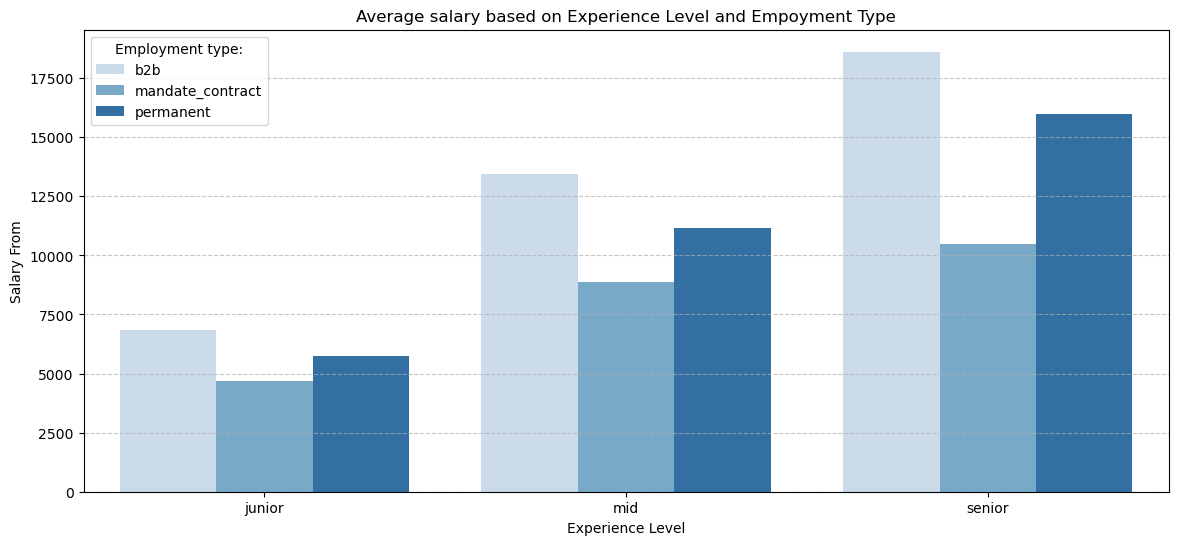

In [28]:
plt.figure(figsize=(14,6))

sns.barplot(data=avg_salary_by_level_empl, x='experience_level', y='salary_from', hue='employment', palette='Blues')
plt.xlabel('Experience Level')
plt.ylabel('Salary From')
plt.title('Average salary based on Experience Level and Empoyment Type')

plt.legend(title='Employment type:')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Analize:

- __b2b__: as we can see in each experience level the best type of employment is b2b because give more salary than other employment types
- __permament__: on the second place is permament employment which is balance between secure employment and pretty good salary
- __mandate_contract__: is the worst employment type is mandate_contract because give us the lowest salary. Please also remember that this group have the smalest sample size based to b2b and permament which are more popular than mandate_contract

### 2.3 Salary vs city

Here we will find the cities with the highest saverage salary based on complete dataset.

__salary vs city overall__

In [29]:
avg_salary_by_city = dfc.groupby('city')['salary_from'].mean().round(2).dropna().reset_index()

avg_salary_by_city.sort_values(by='salary_from', ascending=False)

,city,salary_from
569,Mönchengladbach,70000.0
654,Paoli,57000.0
259,Germantown,48750.0
567,Måløy,38000.0
465,Leusden,37915.0
...,...,...
529,Milano,1500.0
761,Roma,1500.0
229,Elsdorf,1500.0
455,Las Vegas,750.0


Let's search more specify. We will check the highest average salary just in Polish cities with offers over 10

__salary vs city just in Poland with offers over 10 where average salary is the highest__

In [162]:
# filtred dataset by country_code and currency to be sure that we will get just polish cities
polish_cities = dfc[(dfc['country_code'].isin(['PL', 'pl', 'Polska', 'POLSKA'])) & (dfc['currency'].isin(['pln']))]

# count number of offers 
polish_cities_count = polish_cities['city'].value_counts()

# filter cities based on number of offers
polish_cities_valid = polish_cities_count[polish_cities_count >= 10].index

# filter the valid cities 
polish_cities_filtred = polish_cities[polish_cities['city'].isin(polish_cities_valid)]


# count mean salary based on polish cities
avg_salary_by_city_pl = polish_cities_filtred.groupby('city')\
    ['salary_from']\
    .mean()\
    .round(2)\
    .dropna()\
    .sort_values(ascending=False)\

avg_salary_by_city_pl.head(10)

city
Kalwaria Zebrzydowska    19512.77
Czerwińsk Nad Wisłą      19181.82
Żernica                  18866.67
Nadarzyn                 18453.38
Remote                   17814.29
Modlnica                 17566.60
Warsaw                   17138.77
Poland                   16951.39
Łomianki                 16840.93
Краков                   16812.50
Name: salary_from, dtype: float64

We need to make a additional clean of our dataset because we have a wrong City names like: Remote, Poland or Краков. In this analysis we keep focus on cities not remote or overall Poland job offers

In [163]:
invalid_cities = ['Remote', 'Poland']
city_rename = {
    'Краков': 'Kraków',
    'Warsaw': 'Warszawa'
}

avg_salary_by_city_pl = avg_salary_by_city_pl.drop(labels=invalid_cities, errors='ignore')
avg_salary_by_city_pl.rename(index=city_rename, inplace=True)

avg_salary_by_city_pl.head(10)

city
Kalwaria Zebrzydowska    19512.77
Czerwińsk Nad Wisłą      19181.82
Żernica                  18866.67
Nadarzyn                 18453.38
Modlnica                 17566.60
Warszawa                 17138.77
Łomianki                 16840.93
Kraków                   16812.50
Grójec                   16715.59
Skierniewice             16700.50
Name: salary_from, dtype: float64

Take a look on barplot showing 5 best avg salary cities in Poland, we can compare that salary with mean overall

In [164]:
# calculate avg salary for overall polish cities
avg_salary_pl_overall = polish_cities['salary_from'].mean().round(2)
avg_salary_pl_overall

15138.84

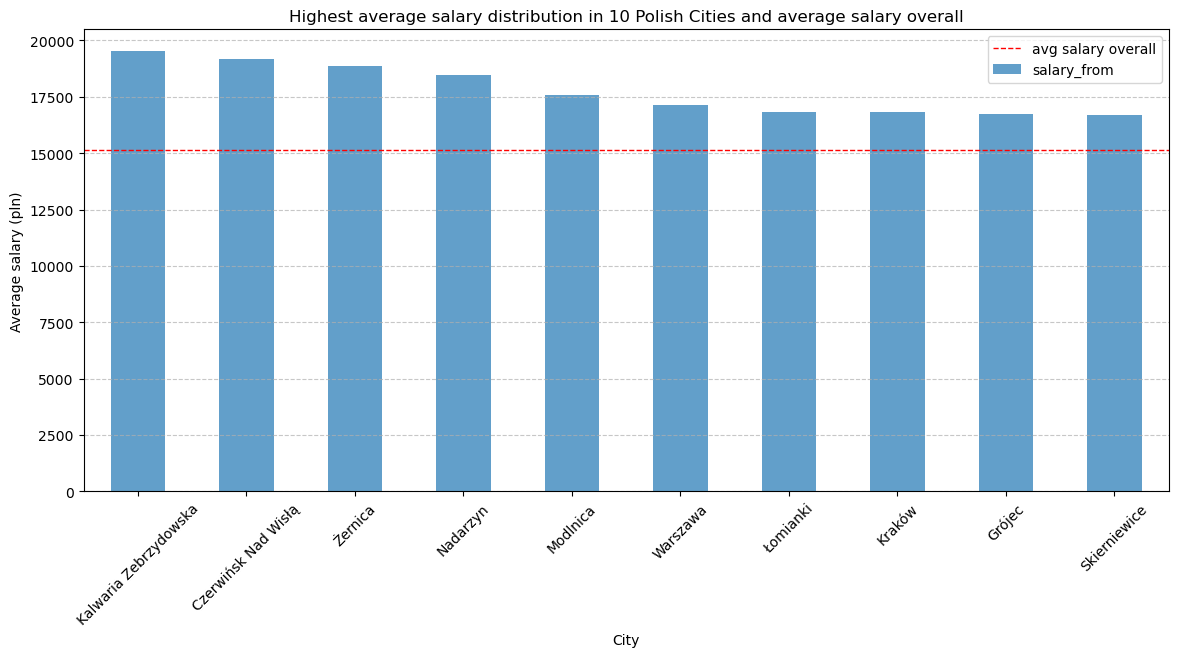

In [213]:
avg_salary_by_city_pl.head(10).plot(kind='bar', figsize=(14,6), alpha=0.7)
plt.axhline(avg_salary_pl_overall, linewidth=1, linestyle='--', color='red', label='avg salary overall')
plt.xlabel('City')
plt.ylabel('Average salary (pln)')
plt.title('Highest average salary distribution in 10 Polish Cities and average salary overall')

plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analize:

On the barplot above we can see Polish cities with offer over 10, where mean salary is the highest. The currency is PLN. 

Red dashed line showing mean salary overall for Polish cities. We see that 10 cities with the best average salary are much higher than average overall.

__salary vs cities where is the most offers__

Now we will check five most popular cities (with most offers) from Poland. Then we will calculate average salary for each city and compare with mean overall

In [264]:
avg_salary_by_city_pl_top = polish_cities.groupby('city')\
    .agg(offer_count=('city', 'size'), avg_salary=('salary_from', 'mean'))\
    .round(2)\
    .dropna()\
    .sort_values(by='offer_count', ascending=False)\

avg_salary_by_city_pl_top.head(10)

,offer_count,avg_salary
city,,
Warszawa,39551,15769.29
Wrocław,26156,15180.94
Kraków,25978,15235.47
Gdańsk,14917,15146.37
Poznań,13956,14462.11
Katowice,10038,15059.05
Łódź,8503,15068.85
Szczecin,5484,15597.96
Lublin,5374,15479.52


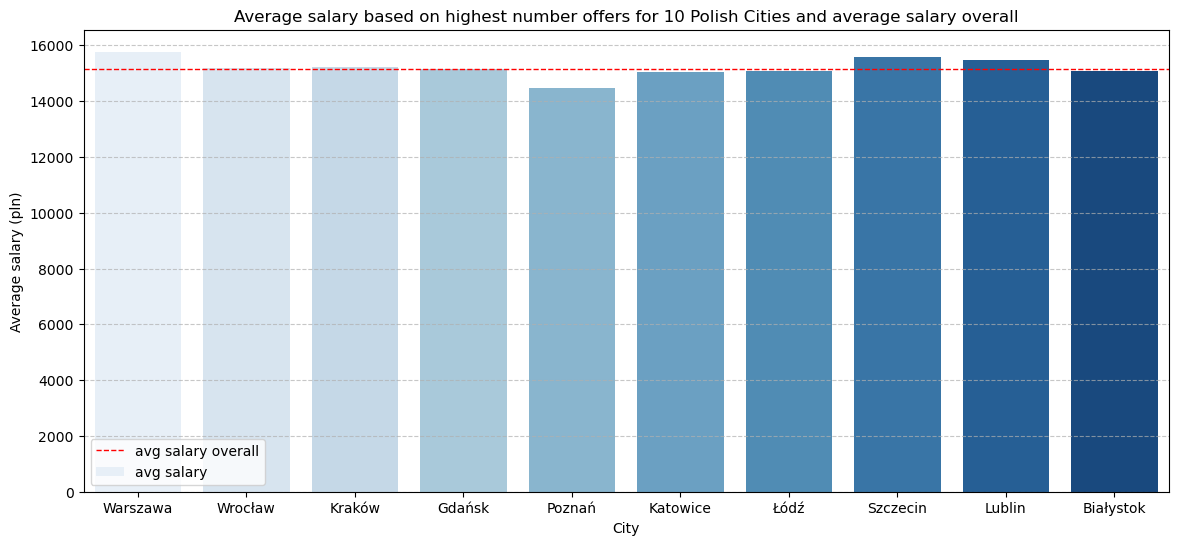

In [265]:
plt.figure(figsize=(14,6))
sns.barplot(data=avg_salary_by_city_pl_top.head(10).reset_index(), x='city', y='avg_salary', palette='Blues', label='avg salary')
plt.axhline(avg_salary_pl_overall, linewidth=1, linestyle='--', color='red', label='avg salary overall')
plt.xlabel('City')
plt.ylabel('Average salary (pln)')
plt.title('Average salary based on highest number offers for 10 Polish Cities and average salary overall')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 2.4 Salary vs country

In [357]:
avg_salary_by_country = dfc.groupby('country_code')['salary_from'].mean().round(2).dropna()
avg_salary_by_country

country_code
AE     7850.00
AL    18000.00
AM     5138.89
AR     2000.00
AT    10326.40
        ...   
US    11494.14
UY     3500.00
UZ     2500.00
VN     2333.33
ZA     9682.77
Name: salary_from, Length: 77, dtype: float64

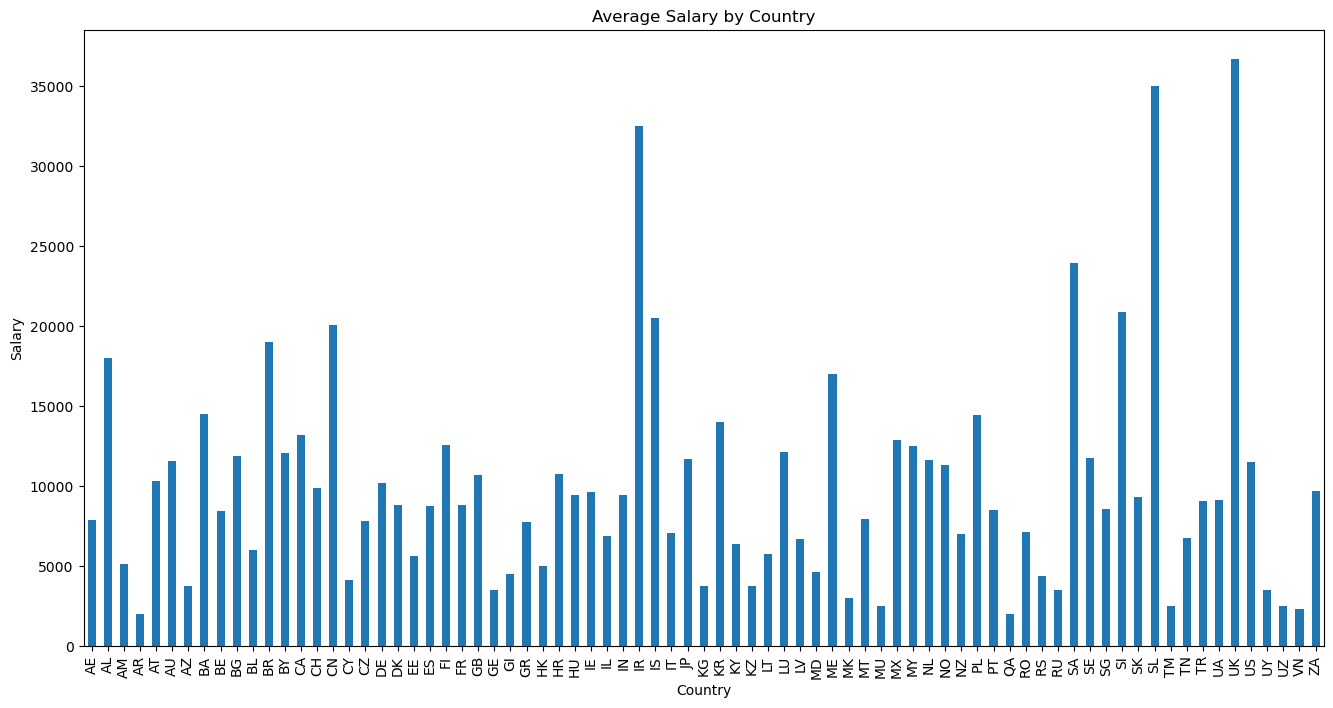

In [358]:
avg_salary_by_country.plot(kind='bar', figsize=(16,8))
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Average Salary by Country')

plt.show()

To check more detailed info about average salary by each country we need to normalize our dataset. 
- currency is different for each country
- city Poland with few different names like Polska, pl. Let's normalize it
- number of offers over 10

First we will normalize names of Polish names as PL

In [359]:
# create a dictionary with changes of names
postcode_rename = {
    'pl' : 'PL',
    'Polska' : 'PL'
} 

dfc['country_code'] = dfc['country_code'].rename(postcode_rename)

dfc_filtred = dfc[~pd.isna(dfc['salary_from'])]

avg_salary_by_country = dfc_filtred.groupby('country_code')\
    .agg(offer_count=('country_code', 'size'), avg_salary=('salary_from', 'mean'))\
    .round(2)\
    .sort_values(by='offer_count', ascending=False)


avg_salary_by_country.head(10)

,offer_count,avg_salary
country_code,,
PL,220579,14424.92
DE,759,10184.27
GB,657,10689.40
US,524,11494.14
CZ,381,7813.74
UA,275,9108.80
ES,271,8750.89
NL,217,11646.56
HU,205,9444.58


Create a average salary overall 

In [360]:
avg_salary_overall = dfc['salary_from'].mean().round(2)

avg_salary_overall

14308.97

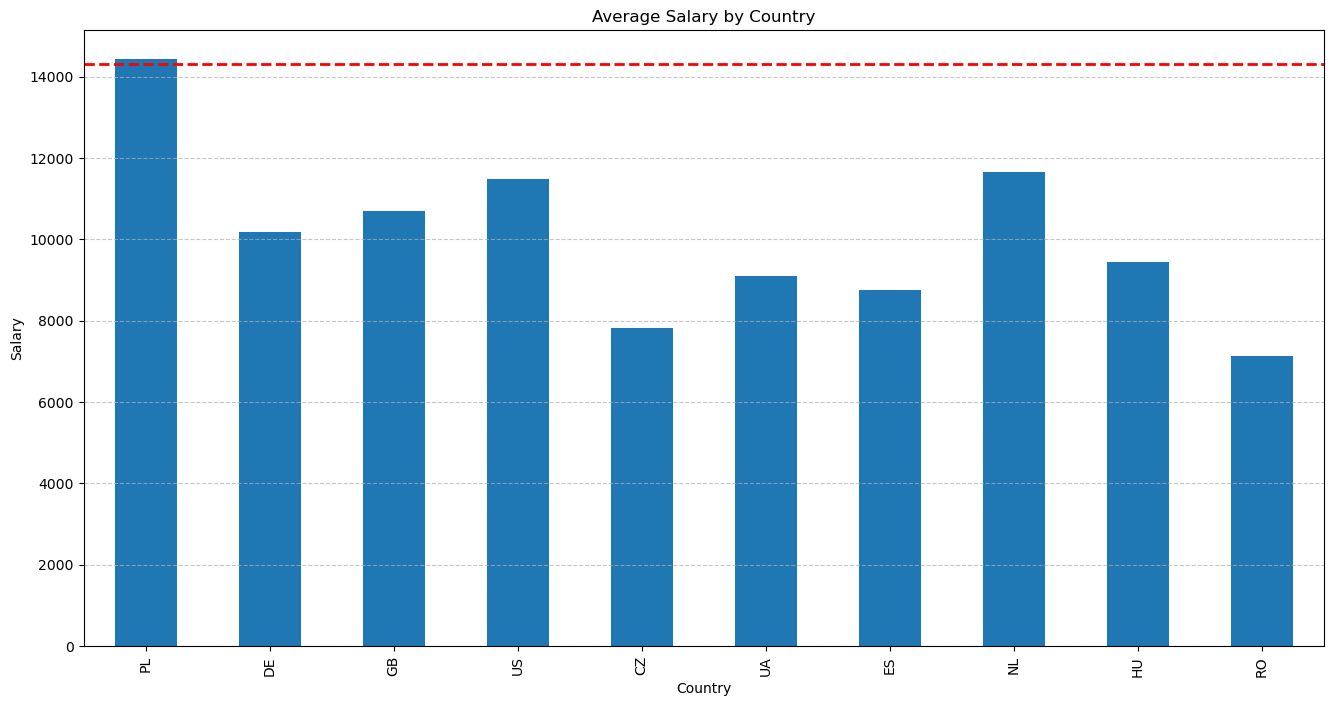

In [361]:
avg_salary_by_country['avg_salary'].head(10).plot(kind='bar', figsize=(16,8))
plt.axhline(avg_salary_overall, linewidth=2, linestyle='--', color='r')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Average Salary by Country')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Above we see a barplot with Average salary for Countries with the highest number of offers compare to the mean overall. But we need to consider a currency

In [362]:
dfc['currency'].value_counts()

currency
pln    206987
eur      9486
usd      8773
gbp       898
chf       138
Name: count, dtype: Int64

In [363]:
currency_conversation = {
    'eur' : 4.30,
    'usd' : 4.03,
    'gbp' : 5.15,
    'chf' : 4.60,
    'pln' : 1.0
}

# add another column with currency pln
dfc['salary_from_pln'] = dfc.apply(
    lambda row: row['salary_from'] * currency_conversation[row['currency'].lower()]
    if not pd.isna(row['salary_from']) else np.nan,
    axis=1
)


dfc.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency,salary_from_pln
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,NaN,senior,True,2022-07-06,С++ (level 4),permanent,NaN,NaN,<NA>,NaN
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,NaN,senior,True,2022-07-05,С++ (level 4),permanent,NaN,NaN,<NA>,NaN
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000.0,25000.0,pln,15000.0
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000.0,25000.0,pln,15000.0
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90.0,junior,True,2022-11-04,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400.0,7300.0,pln,5400.0


Now we have correct currency conversion into PLN. Now we can once again calculate __avg_salary_by_country__

We want to see countries where is offers with currency more than 10 

In [364]:
# before we will group values we want to drop all salary_from_pln where is NaN first
dfc_filtred = dfc[~pd.isna(dfc['salary_from_pln'])]

avg_salary_by_country = dfc_filtred.groupby('country_code')\
    .agg(
        offer_count=('country_code', 'size'),
        avg_salary=('salary_from_pln', 'mean'),
        )\
    .round(2)\
    .sort_values(by='offer_count', ascending=False)

avg_salary_by_country.head(10)

,offer_count,avg_salary
country_code,,
PL,220579,15518.31
DE,759,22355.37
GB,657,26624.69
US,524,24072.36
CZ,381,20728.23
UA,275,16495.63
ES,271,30104.68
NL,217,22865.57
HU,205,20558.33


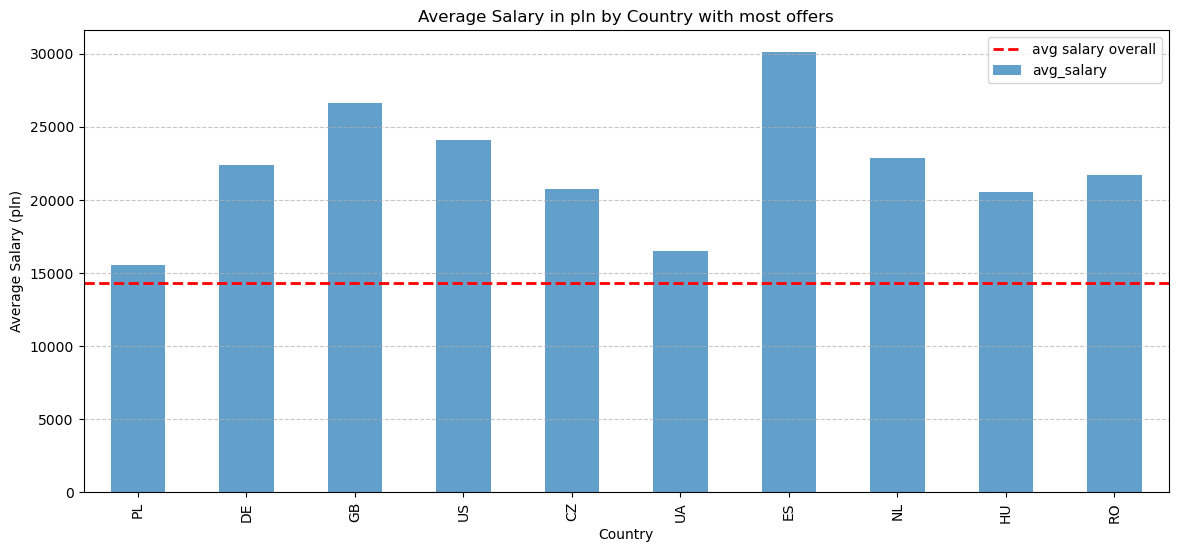

In [371]:
avg_salary_by_country['avg_salary'].head(10).plot(kind='bar', figsize=(14,6), alpha=0.7)
plt.xlabel('Country')
plt.ylabel('Average Salary (pln)')
plt.title('Average Salary in pln by Country with most offers')
plt.axhline(avg_salary_overall, linewidth=2, linestyle='--', color='r', label='avg salary overall')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analize:

After convert salary into the same currency (PLN) we see that the highest average payment is in Espania, on the second place is Great Britain and third place for US (United States). 

The salary in Poland is really low, but we must remeber that PL have the highest number of offers.

### 2.5 Salary vs workpalce type

In [408]:
avg_salary_by_workplace = dfc.groupby(['workplace_type', 'employment'])\
    .agg(offer_count=('workplace_type', 'size'), avg_salary=('salary_from', 'mean'))\
    .round(2)\

avg_salary_by_workplace

offer_count  avg_salary
workplace_type employment                               
office         b2b                      2601    11141.75
               mandate_contract          529     4941.10
               permanent                5100     9272.96
partly_remote  b2b                     24232    14619.44
               mandate_contract         1247     6390.84
               permanent               39268    12297.24
remote         b2b                    141266    15561.55
               mandate_contract         2582     8094.43
               permanent               91993    12965.26

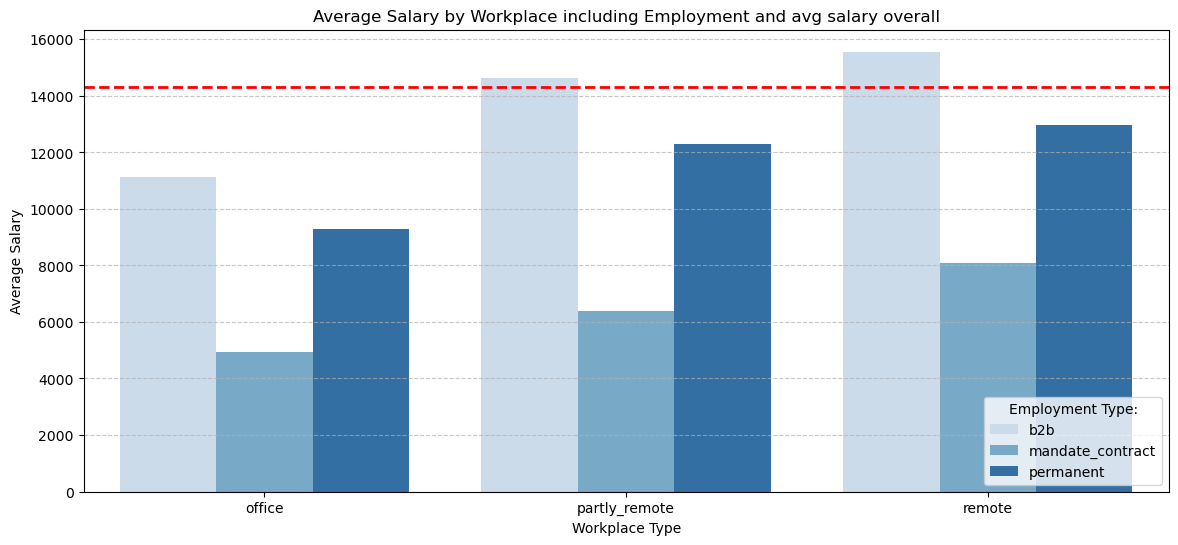

In [423]:
plt.figure(figsize=(14,6))
sns.barplot(data=avg_salary_by_workplace.reset_index(), x='workplace_type', y='avg_salary', hue='employment', palette='Blues')
plt.xlabel('Workplace Type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Workplace including Employment and avg salary overall')
plt.axhline(avg_salary_overall, linewidth=2, linestyle='--', color='red')
plt.legend(loc='lower right', title='Employment Type:')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analize:

Only Remote offers is higher than average salary overall. 

We see also that remote offers are the most popular (more than partly remote and office together)

### 2.6 Salary vs marker_icon

Calculate average salary for most popular technology (marker_icon) and each employment type

In [445]:
dfc['marker_icon'].value_counts()

marker_icon
javascript      43514
java            32855
testing         22483
net             21597
devops          20944
data            18754
pm              16453
php             15263
python          15096
mobile          13437
admin           11943
analytics       11503
support          9829
c                9702
architecture     8999
other            7281
erp              6346
ux               6305
security         5290
ruby             3668
go               2483
game             2105
html             1824
scala            1144
Name: count, dtype: Int64

#### Sort by number of offers

In [484]:
avg_salary_by_marker = dfc.groupby(['marker_icon', 'employment'])\
    .agg(offer_count=('marker_icon', 'size'), avg_salary=('salary_from_pln', 'mean'))\
    .round(2)

# Sortowanie według liczby ofert w marker_icon (value_counts)
avg_salary_by_marker = avg_salary_by_marker.sort_values(
    by=['marker_icon'],
    key = lambda x: x.map(dfc['marker_icon'].value_counts()),
    ascending=False
)

avg_salary_by_marker.head(30)

offer_count  avg_salary
marker_icon employment                               
javascript  b2b                     28169    16614.79
            mandate_contract          726    11516.34
            permanent               14619    14020.32
java        b2b                     18722    18331.71
            mandate_contract          388    10990.38
            permanent               13745    14435.91
testing     permanent                9961    10858.12
            mandate_contract          285     4941.91
            b2b                     12237    13515.72
net         b2b                     12539    17540.33
            mandate_contract          268     9650.73
            permanent                8790    13350.03
devops      permanent                8992    16556.53
            mandate_contract          173    11291.49
            b2b                     11779    19853.30
data        permanent                8901    15304.18
            mandate_contract          157     7558.73
            b2b                      9696    18826.31
pm          b2b                      8490    15476.18
            mandate_contract          134     6822.44
            permanent                7829    14656.62
php         mandate_contract          280    10031.00
            b2b                      9945    12840.55
            permanent                5038    11131.38
python      b2b                      8601    17941.77
            mandate_contract          298    15329.39
            permanent                6197    16475.87
mobile      permanent                5202    14248.87
            mandate_contract          298    16260.49
            b2b                      7937    16181.45

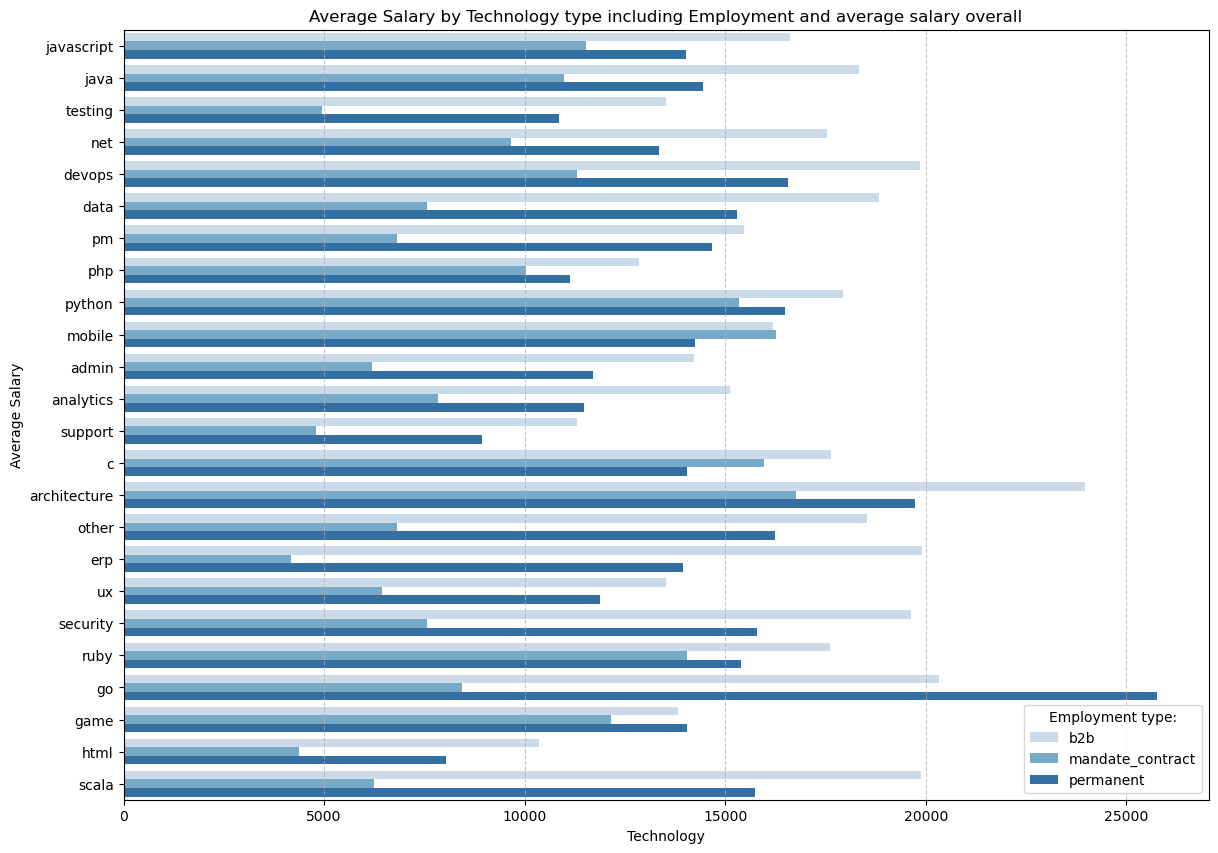

In [506]:
plt.figure(figsize=(14,10))
sns.barplot(data=avg_salary_by_marker.reset_index(), x='avg_salary', y='marker_icon', hue='employment' , palette='Blues')
plt.xlabel('Technology')
plt.ylabel('Average Salary')
plt.title('Average Salary by Technology type including Employment and average salary overall')
#plt.axhline(avg_salary_overall, linestyle='--', linewidth=2, color='red')

plt.legend(loc='lower right', title='Employment type:')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Sort by Average Salary (from the highest)

In [526]:
avg_salary_by_marker = dfc.groupby(['marker_icon', 'employment'])\
    .agg(offer_count=('marker_icon', 'size'), avg_salary=('salary_from_pln', 'mean'))\
    .round(2)\
    .sort_values(by='avg_salary', ascending=False)

avg_salary_by_marker

,,offer_count,avg_salary
marker_icon,employment,,
go,permanent,1063,25757.40
architecture,b2b,4061,23970.65
go,b2b,1409,20330.43
erp,b2b,2399,19892.87
scala,b2b,748,19873.37
...,...,...,...
admin,mandate_contract,126,6197.14
testing,mandate_contract,285,4941.91
support,mandate_contract,353,4796.10


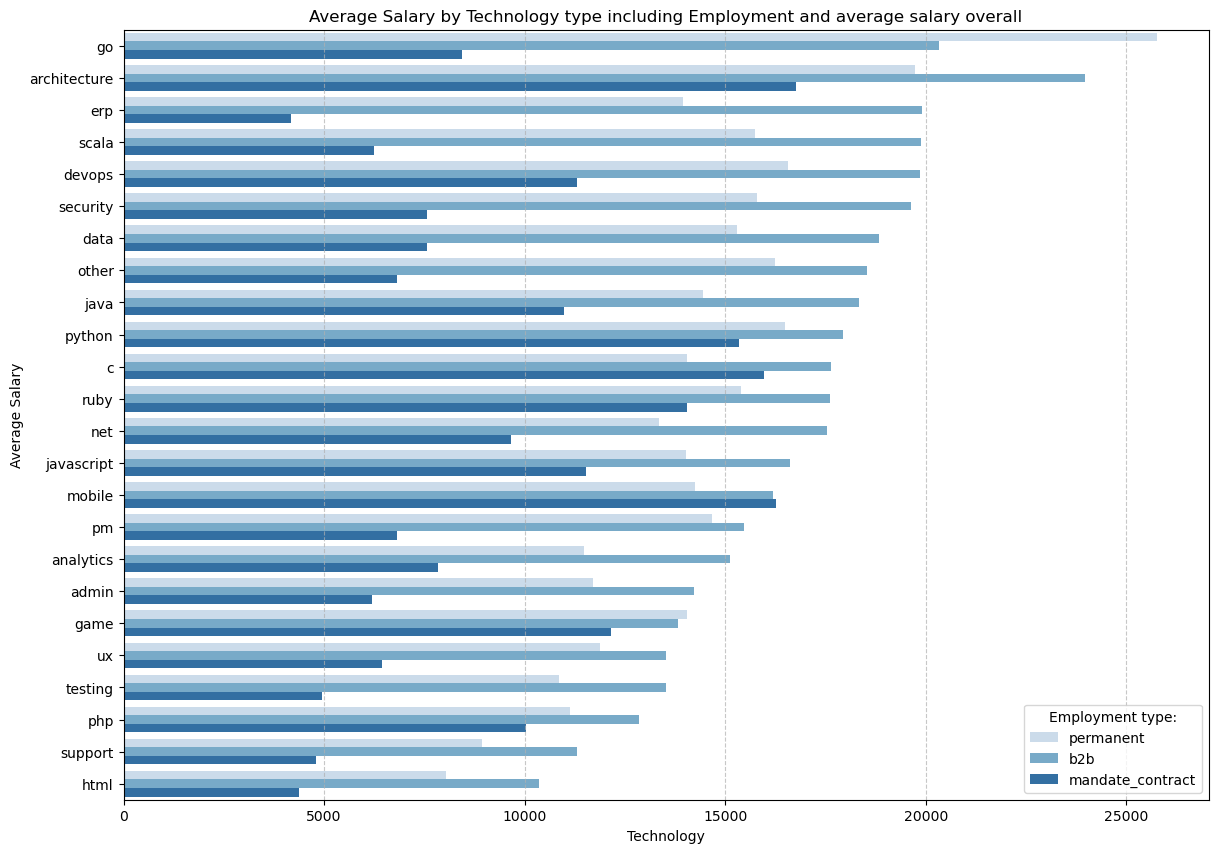

In [524]:
plt.figure(figsize=(14,10))
sns.barplot(data=avg_salary_by_marker.reset_index(), x='avg_salary', y='marker_icon', hue='employment' , palette='Blues')
plt.xlabel('Technology')
plt.ylabel('Average Salary')
plt.title('Average Salary by Technology type including Employment and average salary overall')
#plt.axhline(avg_salary_overall, linestyle='--', linewidth=2, color='red')

plt.legend(loc='lower right', title='Employment type:')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 2.7 Salary vs Company Size

In [508]:
dfc['company_size'].value_counts()

company_size
30.0        6366
50.0        6158
100.0       5934
200.0       5741
75.0        4760
            ... 
139.0          1
124.0          1
130000.0       1
2300.0         1
4200.0         1
Name: count, Length: 282, dtype: int64

In [509]:
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10000+']

dfc['company_size_group'] = pd.cut(dfc['company_size'], bins=bins, labels=labels, right=False)

dfc

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency,salary_from_pln,company_size_group
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,NaN,senior,True,2022-07-06,С++ (level 4),permanent,NaN,NaN,<NA>,NaN,NaN
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,NaN,senior,True,2022-07-05,С++ (level 4),permanent,NaN,NaN,<NA>,NaN,NaN
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000.0,25000.0,pln,15000.0,NaN
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000.0,25000.0,pln,15000.0,NaN
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90.0,junior,True,2022-11-04,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400.0,7300.0,pln,5400.0,51-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311583,Programista C++,c,partly_remote,Posnet Polska S.A.,Gdynia,PL,225.0,junior,False,2021-11-23,"Redmine (level 1), Git (level 3), C++ (level 3)",permanent,NaN,NaN,<NA>,NaN,101-500
11311976,Backend Java Engineer,java,remote,EliteHunter.pl,Warszawa,PL,2.0,senior,True,2021-11-23,"Spring Boot (level 3), Spring (level 3), Java ...",b2b,22000.0,28000.0,pln,22000.0,0-10
11316661,Frontend Developer (React),javascript,remote,Codibly,Kraków,PL,NaN,mid,True,2021-11-19,"TypeScript (level 3), React (level 3), JavaScr...",b2b,13440.0,18480.0,pln,13440.0,NaN
11330955,Analityk Syst. Zespół Rozwoju Aplikacji,analytics,partly_remote,Bank Millennium,Warszawa,PL,6850.0,senior,False,2022-07-11,"English (level 3), Architecture (level 3), Ana...",permanent,NaN,NaN,<NA>,NaN,5001-10000


In [515]:
avg_salary_by_company_size = dfc.groupby('company_size_group')\
    .agg(offer_count=('company_size', 'size'), avg_salary=('salary_from', 'mean'))\
    .round(2)\
    .sort_values(by='company_size_group', ascending=False)
    
avg_salary_by_company_size

,offer_count,avg_salary
company_size_group,,
10000+,5086,17848.83
5001-10000,2978,11592.49
1001-5000,15086,15624.69
501-1000,13636,15141.18
101-500,41843,13895.86
51-100,21685,14076.19
11-50,40609,13608.24
0-10,5118,12485.30


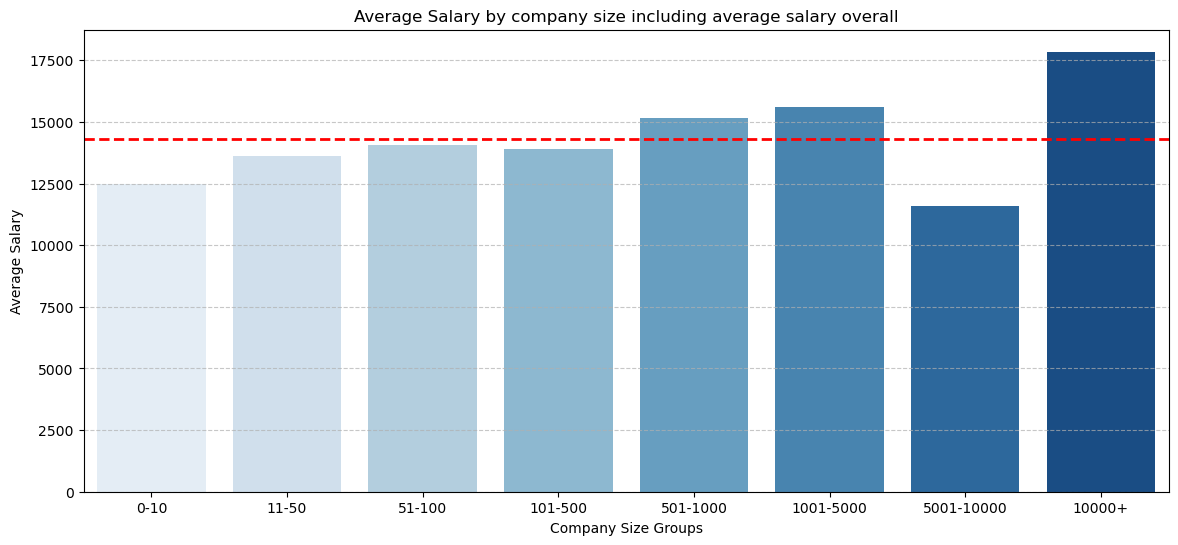

In [637]:
plt.figure(figsize=(14,6))
sns.barplot(data=avg_salary_by_company_size.reset_index(), x='company_size_group', y='avg_salary', palette='Blues')
plt.xlabel("Company Size Groups")
plt.ylabel('Average Salary')
plt.title('Average Salary by company size including average salary overall')

plt.axhline(avg_salary_overall, linestyle='--', linewidth=2, color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Published offers

Show the popularity of offers compare with each technology based on the each month from period 2021 - 2023

In [539]:
dfc['employment'].value_counts()

employment
b2b                 168099
permanent           136361
mandate_contract      4358
Name: count, dtype: Int64

First we take a look on a number offers by each month

#### without duplicates

In [566]:
# add column with month_year and set just month and year fo each row
dfc['month_year'] = dfc['published_at'].dt.to_period('M')

dfc.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency,salary_from_pln,company_size_group,month_year
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,NaN,senior,True,2022-07-06,С++ (level 4),permanent,NaN,NaN,<NA>,NaN,NaN,2022-07
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,NaN,senior,True,2022-07-05,С++ (level 4),permanent,NaN,NaN,<NA>,NaN,NaN,2022-07
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000.0,25000.0,pln,15000.0,NaN,2022-11
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,NaN,senior,True,2022-11-04,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000.0,25000.0,pln,15000.0,NaN,2022-11
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90.0,junior,True,2022-11-04,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400.0,7300.0,pln,5400.0,51-100,2022-11


In [551]:
offers_by_month_employment = dfc\
    .groupby(['month_year', 'employment'])\
    .size()\
    .unstack(fill_value=0)


employment,b2b,mandate_contract,permanent
month_year,,,
2021-01,29,2,22
2021-02,40,2,20
2021-03,49,1,52
2021-04,41,1,33
2021-05,46,3,34
2021-06,36,2,19
2021-07,49,0,25
2021-08,72,1,36
2021-09,57,1,54


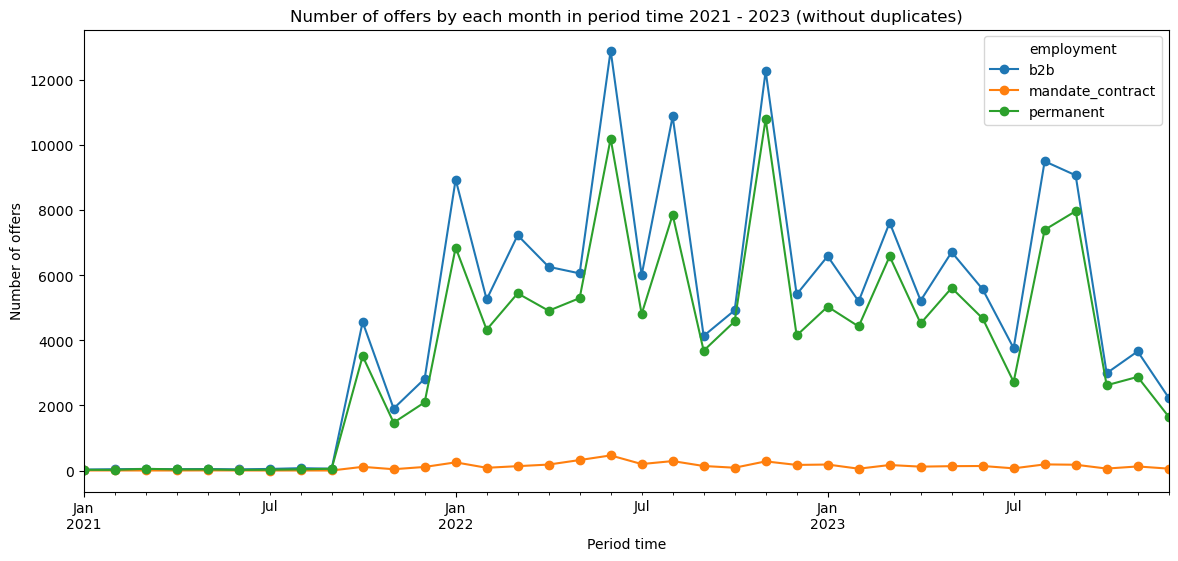

In [574]:
offers_by_month_employment.plot(marker='o', figsize=(14,6))
plt.xlabel('Period time')
plt.ylabel('Number of offers')
plt.title('Number of offers by each month in period time 2021 - 2023 (without duplicates)')

plt.show()

#### Including duplicates

We use a dataframe df including all duplicates where we didn't clean up.

In [561]:
# Conversion column 'published_at' on datetime64
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')

/var/folders/js/txk91lfd5k93zwc3s8s0r3t80000gn/T/ipykernel_13278/2033166748.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11367731 entries, 0 to 11367730
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   title             object        
 1   marker_icon       object        
 2   workplace_type    object        
 3   company_name      object        
 4   city              object        
 5   country_code      object        
 6   company_size      object        
 7   experience_level  object        
 8   remote            bool          
 9   published_at      datetime64[ns]
 10  skills            object        
 11  employment        object        
 12  salary_from       object        
 13  salary_to         object        
 14  currency          object        
dtypes: bool(1), datetime64[ns](1), object(13)
memory usage: 1.2+ GB


In [567]:
# add suitable column month_year for analysis
df['month_year'] = df['published_at'].dt.to_period('M')
df.head()

,title,marker_icon,workplace_type,company_name,city,country_code,company_size,experience_level,remote,published_at,skills,employment,salary_from,salary_to,currency,month_year
0,Senior Ui Developer,game,remote,Dragons Lake,Wrocław,PL,170+,senior,True,2022-07-06,С++ (level 4),permanent,No info,No info,NaN,2022-07
1,Senior Ui Developer,game,remote,Dragons Lake,Poznań,PL,170+,senior,True,2022-07-05,С++ (level 4),permanent,No info,No info,NaN,2022-07
2,Django Full Stack Developer,python,remote,MIM Solutions,Warszawa,PL,30+,senior,True,2022-11-04,"GCloud (level 3), JavaScript (level 3), Django...",permanent,15000,25000,pln,2022-11
3,Android Developer,mobile,remote,MIM Solutions,Warszawa,PL,30+,senior,True,2022-11-04,"Git (level 3), Java (level 4), Android (level 4)",b2b,15000,25000,pln,2022-11
4,Product Specialist - Technical Support,support,remote,Kitopi,Kraków,PL,90,junior,True,2022-11-04,"Agile (level 2), JIRA (level 2), English (leve...",b2b,5400,7300,pln,2022-11


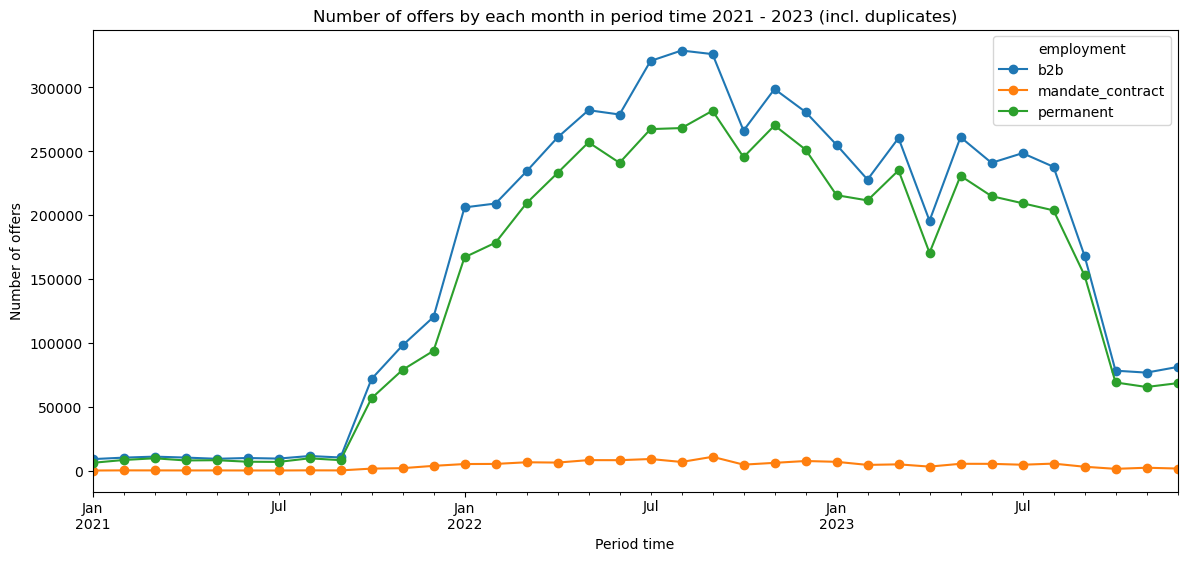

In [576]:
offers_by_month_employment_duplicates = df\
    .groupby(['month_year', 'employment'])\
    .size()\
    .unstack(fill_value=0)

offers_by_month_employment_duplicates.plot(figsize=(14,6), marker='o')
plt.xlabel('Period time')
plt.ylabel('Number of offers')
plt.title('Number of offers by each month in period time 2021 - 2023 (incl. duplicates)')

plt.show()

Now we will check most popular technologies using three different employment types.

We will work on dfc which doesn't includes duplicates to get more detailed shape of offers.

### 3.1 Published offers for each technolgy in period 2021 - 2023

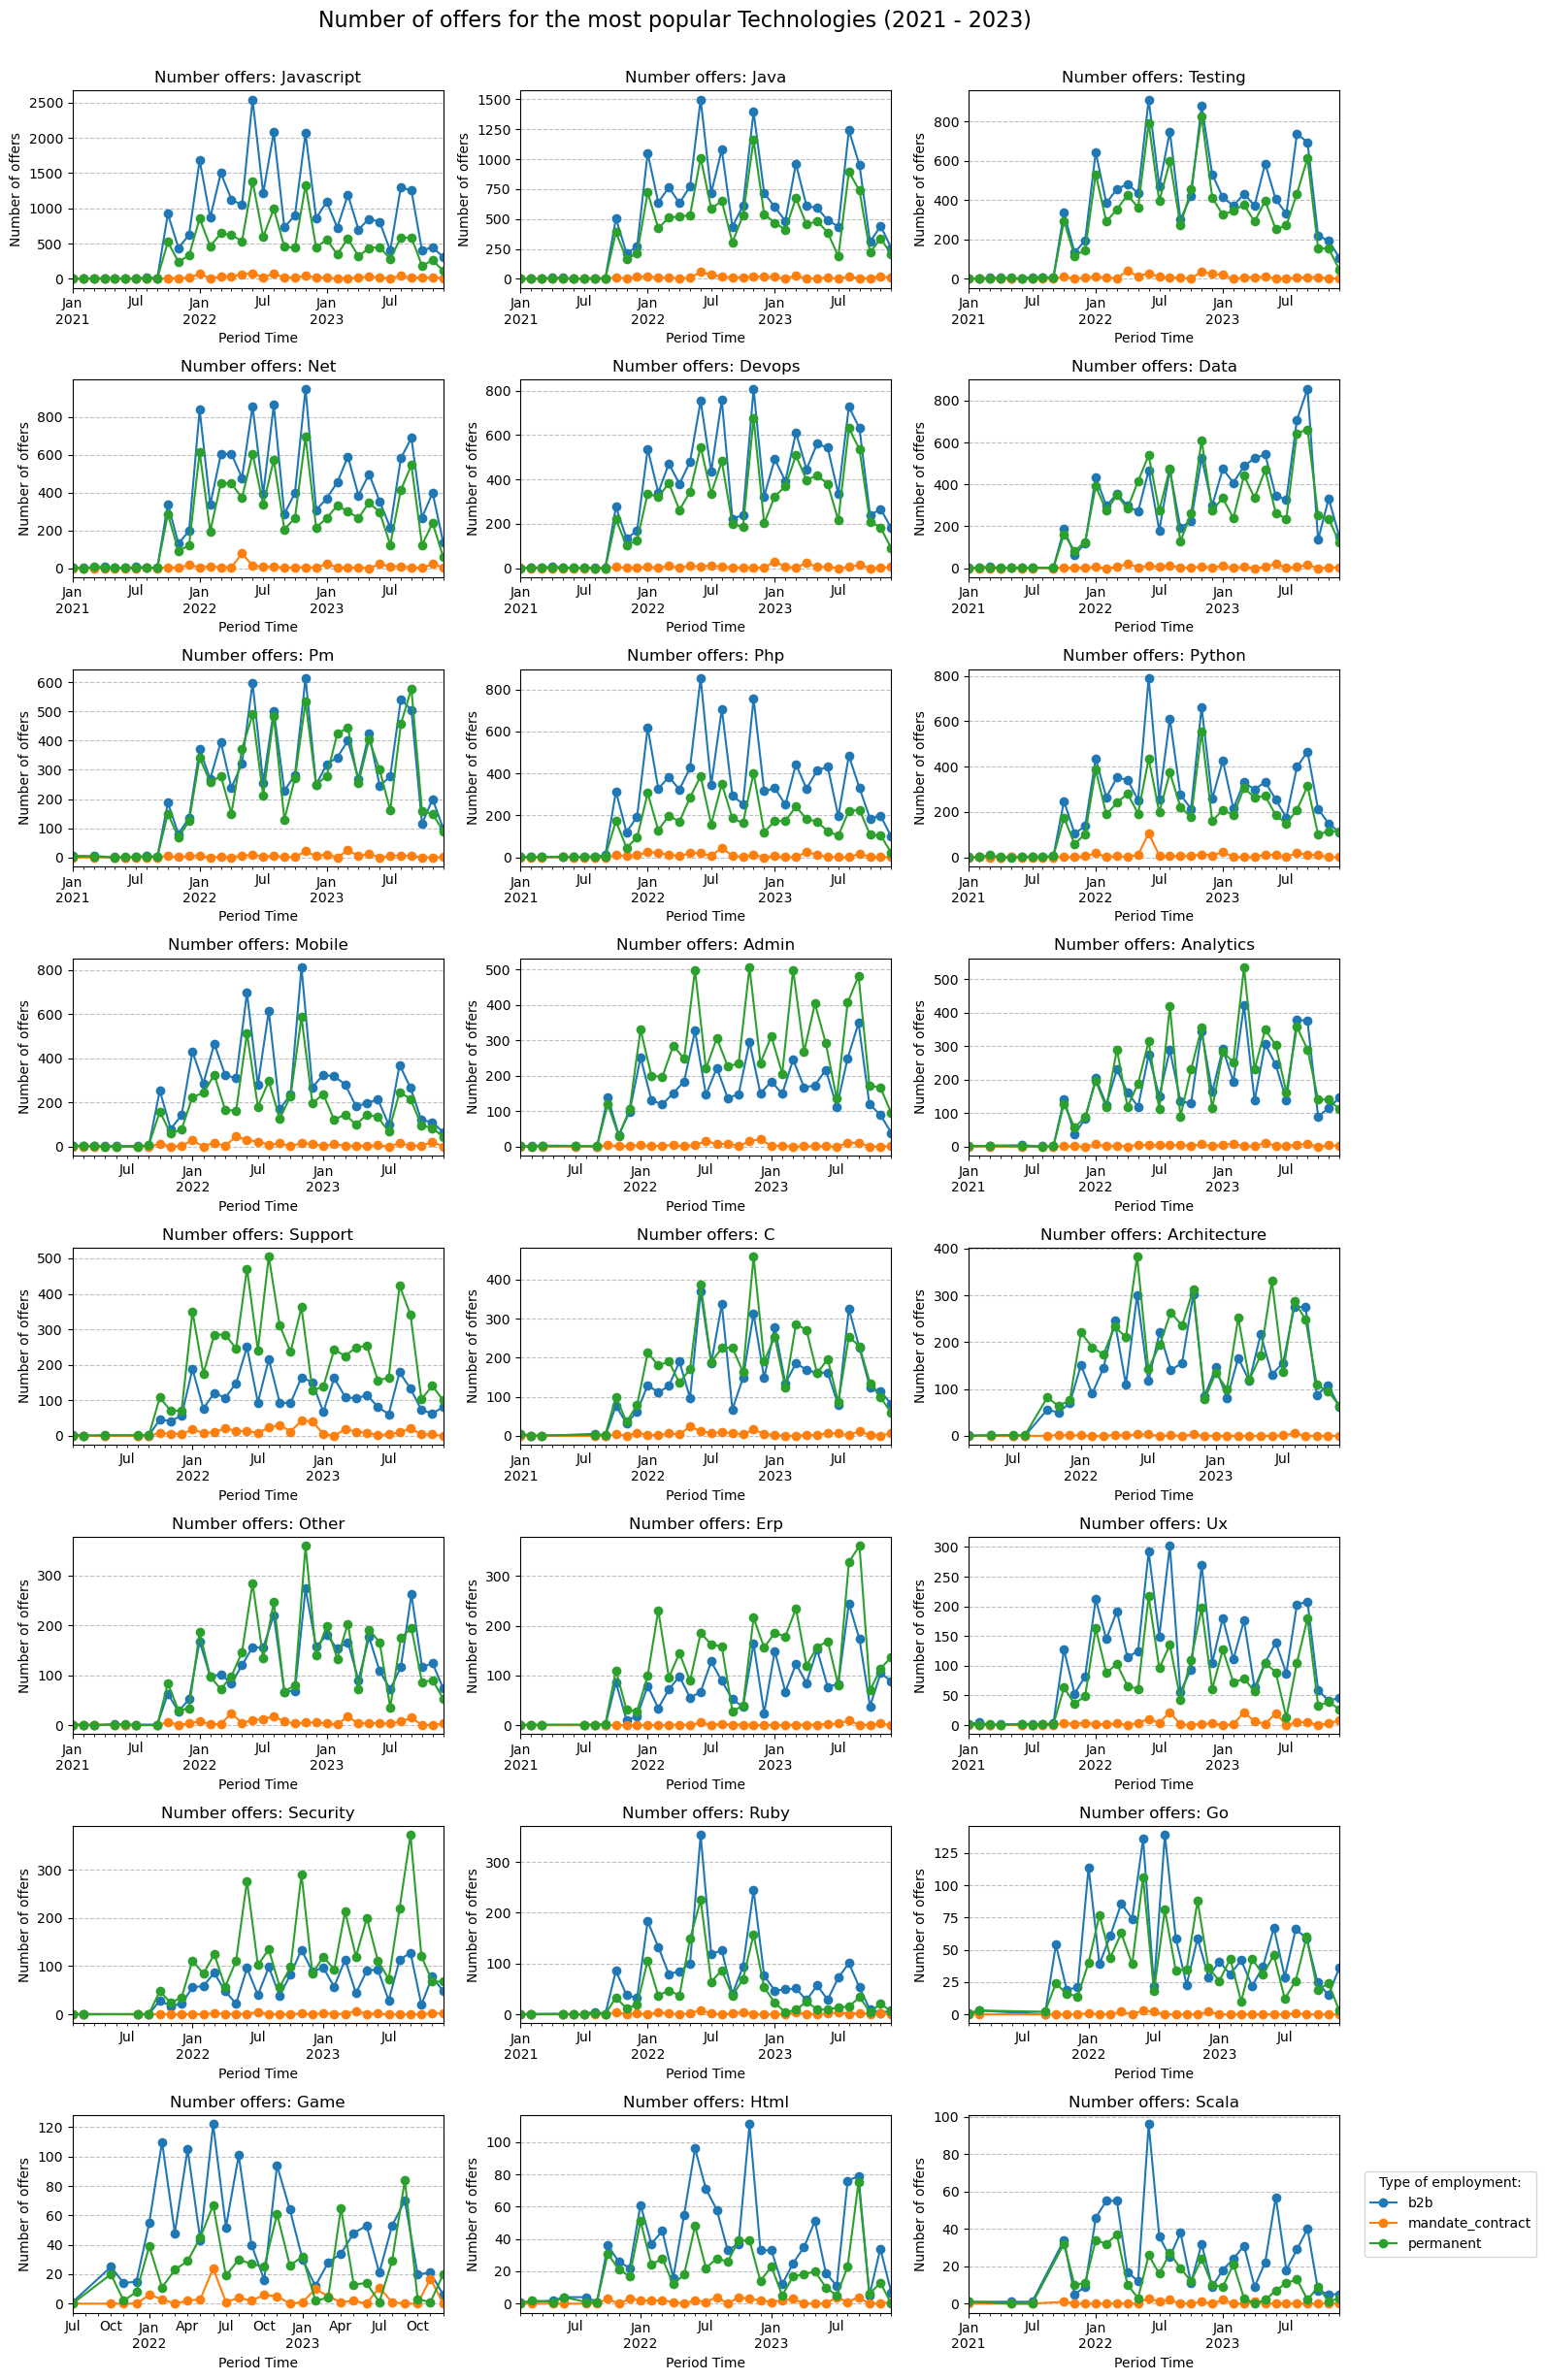

In [648]:
# take top 10 technologies from our dataset (based on number of offers)
top_techs = dfc['marker_icon'].value_counts().index

plt.figure(figsize=(14,24))

for i, tech in enumerate(top_techs, 1):
    
    tech_offers = dfc[dfc['marker_icon'] == tech]
    
    # groups by months and count offers with correct employment
    offers_by_month = tech_offers.groupby(['month_year', 'employment']).size().unstack(fill_value=0)
    
    # create subplot
    plt.subplot(8, 3, i)
    offers_by_month.plot(ax=plt.gca(), marker='o', legend=False)
    plt.title(f'Number offers: {tech.capitalize()}')
    plt.xlabel('Period Time')
    plt.ylabel('Number of offers')
    #plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    
    
plt.tight_layout()
plt.legend(title='Type of employment:', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.suptitle('Number of offers for the most popular Technologies (2021 - 2023)', fontsize=16, y=1.02)
plt.show()

### 3.2 Period time of average salary for each technology

How the salary was change for each technology based on period 2021 - 2023

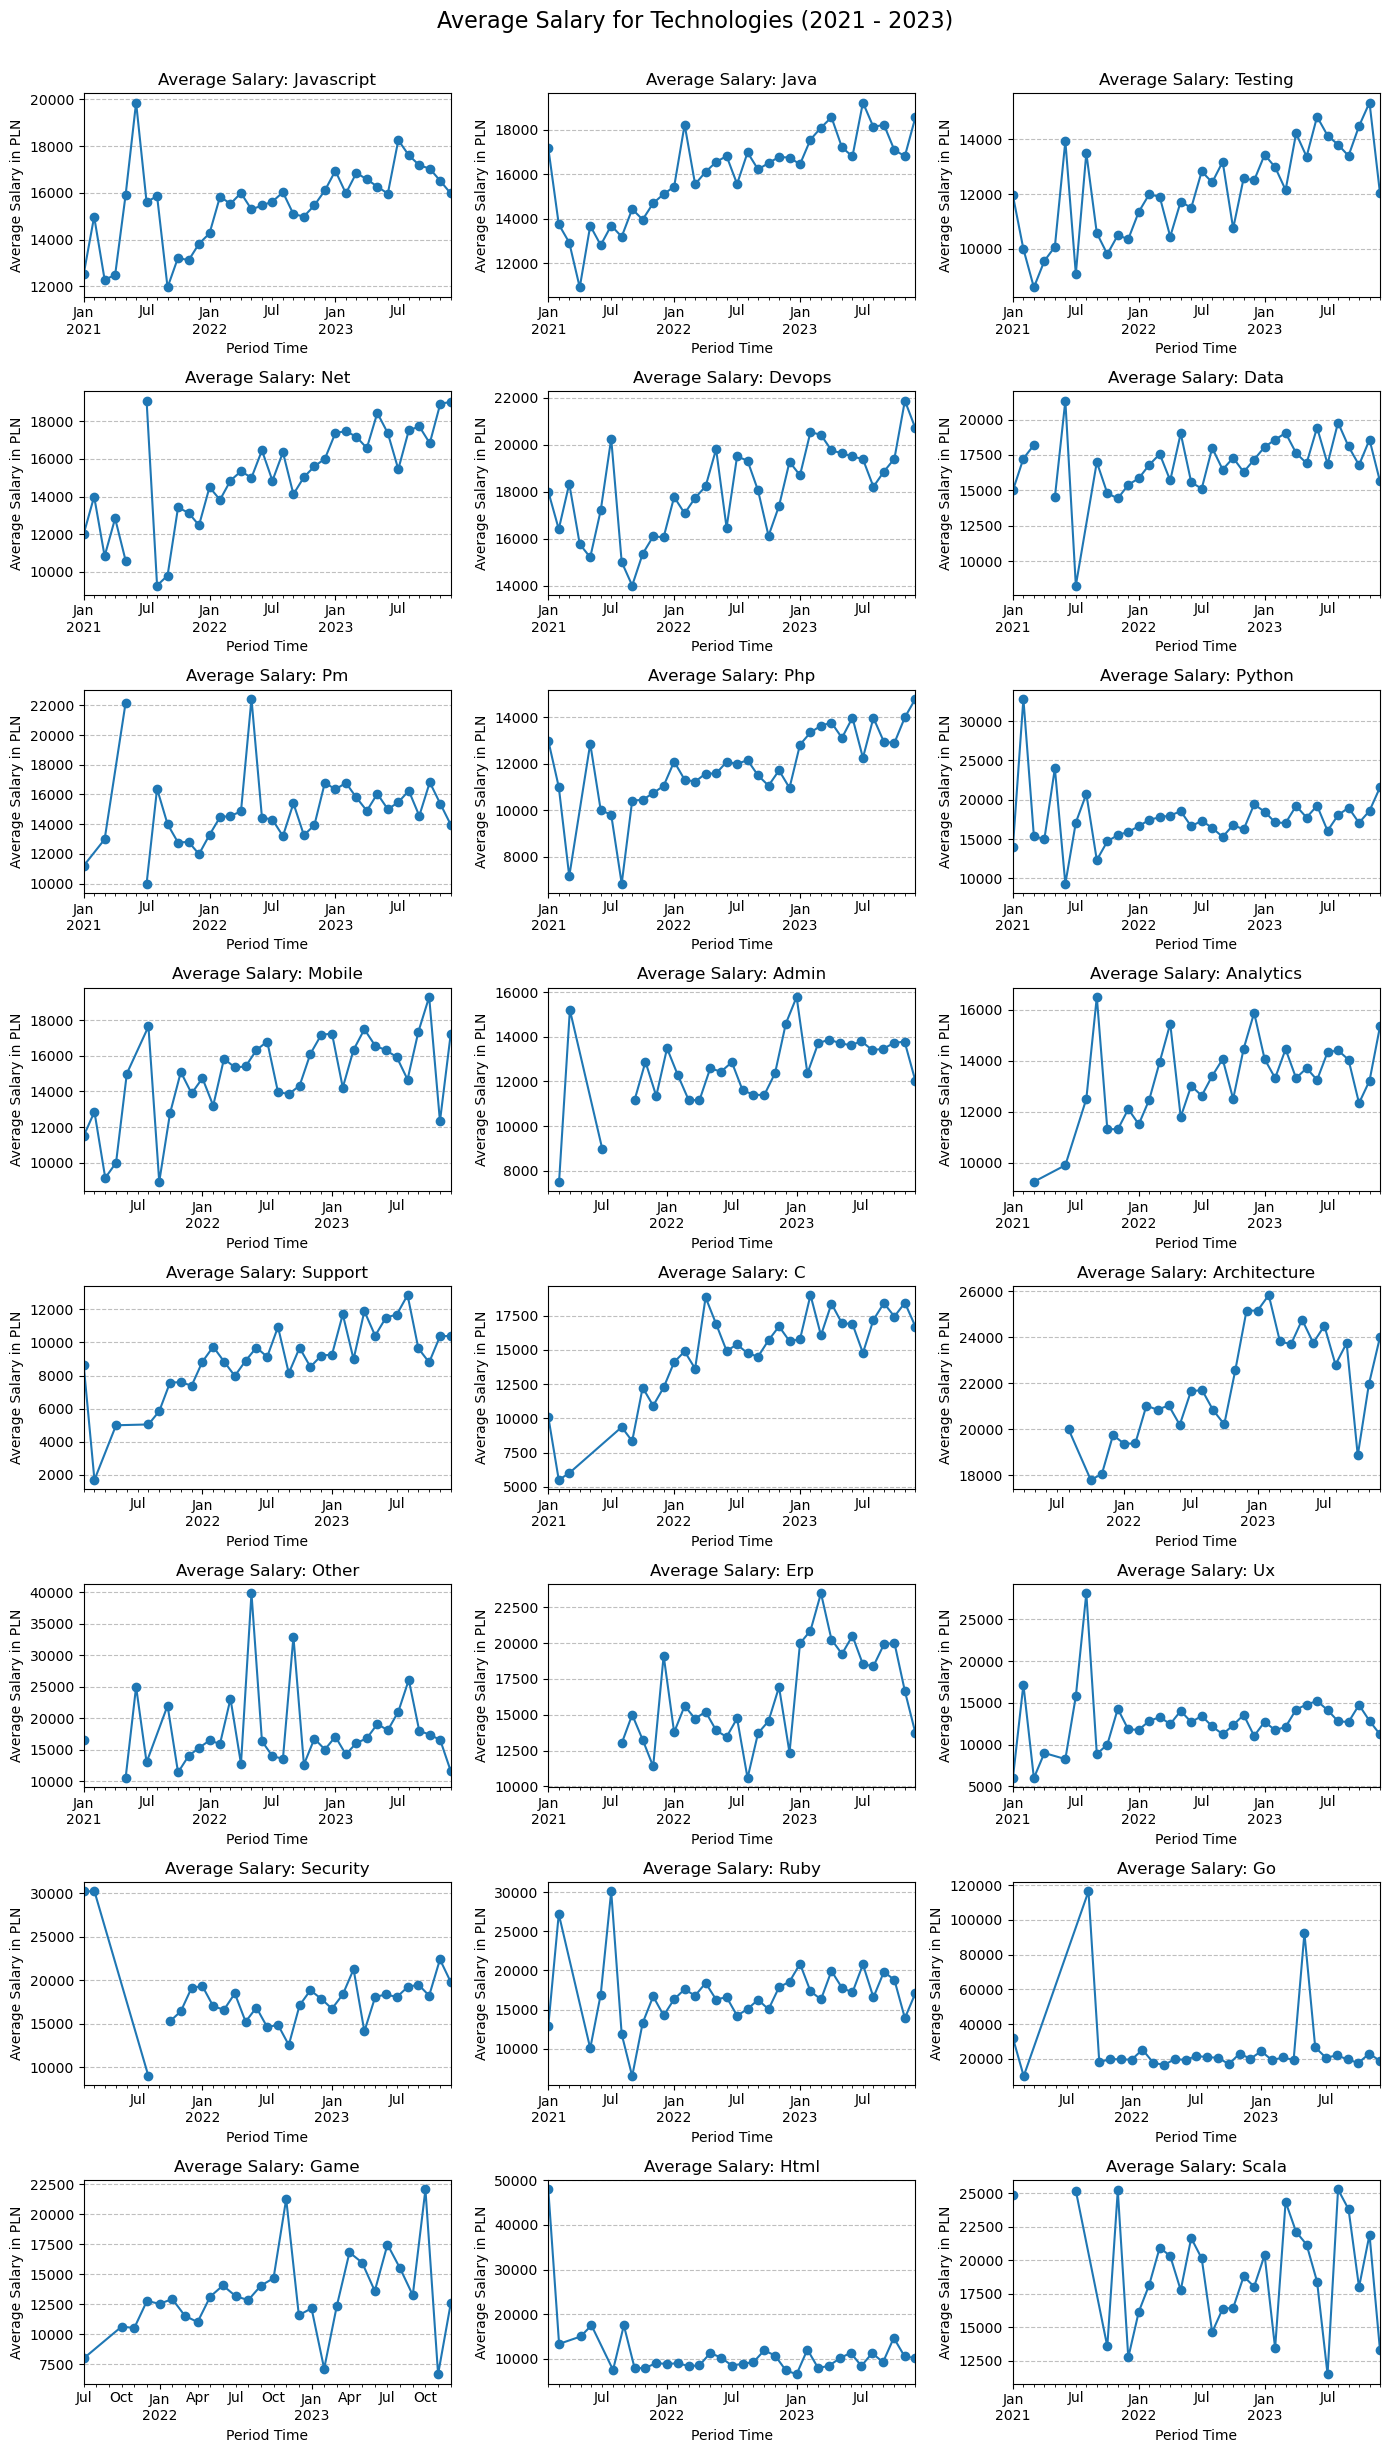

In [656]:
plt.figure(figsize=(14,24))

for i, tech in enumerate(top_techs, 1):
    tech_offers = dfc[dfc['marker_icon'] == tech]
    
    avg_salary_by_month = tech_offers.groupby(['month_year'])['salary_from_pln'].mean()
    
    plt.subplot(8, 3, i)
    avg_salary_by_month.plot(ax=plt.gca(), marker='o', legend=False)
    plt.title(f'Average Salary: {tech.capitalize()}')
    plt.xlabel('Period Time')
    plt.ylabel('Average Salary in PLN')
    #plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    
plt.tight_layout()
plt.suptitle('Average Salary for Technologies (2021 - 2023)', fontsize=16, y=1.02)
plt.show()
